# Implementation

In [1]:
#Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
data = pd.read_csv('../dataset/emails.csv')

print("Dataset loaded successfully")

Dataset loaded successfully


In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Data Preprocessing

In [4]:
data.shape

(5728, 2)

In [5]:
# Identify duplicates
duplicates = data[data.duplicated()]
print("Duplicate data before drop:", len(duplicates))

# Drop duplicates
data = data.drop_duplicates()
print("Duplicated Data Drop Done")

# Check for duplicates after dropping
print("Duplicate data after drop:", data.duplicated().sum())

Duplicate data before drop: 33
Duplicated Data Drop Done
Duplicate data after drop: 0


In [6]:
#Check Data Null
data.isnull().sum()

text    0
spam    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

Convert Uppercase to Lowercase

In [8]:
data["text"].head

<bound method NDFrame.head of 0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5695, dtype: object>

In [9]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["text"].head

<bound method NDFrame.head of 0       subject: naturally irresistible your corporate...
1       subject: the stock trading gunslinger fanny is...
2       subject: unbelievable new homes made easy im w...
3       subject: 4 color printing special request addi...
4       subject: do not have money , get software cds ...
                              ...                        
5723    subject: re : research and development charges...
5724    subject: re : receipts from visit jim , thanks...
5725    subject: re : enron case study update wow ! al...
5726    subject: re : interest david , please , call s...
5727    subject: news : aurora 5 . 2 update aurora ver...
Name: text, Length: 5695, dtype: object>

Remove Links 

In [11]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data["text"].head

<bound method NDFrame.head of 0       subject: naturally irresistible your corporate...
1       subject: the stock trading gunslinger fanny is...
2       subject: unbelievable new homes made easy im w...
3       subject: 4 color printing special request addi...
4       subject: do not have money , get software cds ...
                              ...                        
5723    subject: re : research and development charges...
5724    subject: re : receipts from visit jim , thanks...
5725    subject: re : enron case study update wow ! al...
5726    subject: re : interest david , please , call s...
5727    subject: news : aurora 5 . 2 update aurora ver...
Name: text, Length: 5695, dtype: object>

Remove Punctuations

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["text"] = data["text"].apply(remove_punctuations)

In [14]:
data["text"].head

<bound method NDFrame.head of 0       subject naturally irresistible your corporate ...
1       subject the stock trading gunslinger fanny is ...
2       subject unbelievable new homes made easy im wa...
3       subject 4 color printing special request addit...
4       subject do not have money  get software cds fr...
                              ...                        
5723    subject re  research and development charges t...
5724    subject re  receipts from visit jim  thanks ag...
5725    subject re  enron case study update wow  all o...
5726    subject re  interest david  please  call shirl...
5727    subject news  aurora 5  2 update aurora versio...
Name: text, Length: 5695, dtype: object>

Remove Numbers

In [15]:
data["text"] = data['text'].str.replace(r'\d+', '', regex=True)


In [16]:
data["text"].head

<bound method NDFrame.head of 0       subject naturally irresistible your corporate ...
1       subject the stock trading gunslinger fanny is ...
2       subject unbelievable new homes made easy im wa...
3       subject  color printing special request additi...
4       subject do not have money  get software cds fr...
                              ...                        
5723    subject re  research and development charges t...
5724    subject re  receipts from visit jim  thanks ag...
5725    subject re  enron case study update wow  all o...
5726    subject re  interest david  please  call shirl...
5727    subject news  aurora    update aurora version ...
Name: text, Length: 5695, dtype: object>

Remove Stopwords

In [17]:
import nltk
import os

#check the folder
download_dir = '../stopwordsMain'
os.makedirs(download_dir, exist_ok=True)

#download stopwords
nltk.download('stopwords', download_dir='../stopwordsMain')

#open Stopwords
with open('../stopwordsMain/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
    
# print(sw)
    

[nltk_data] Downloading package stopwords to ../stopwordsMain...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [19]:
data["text"].head

<bound method NDFrame.head of 0       subject naturally irresistible corporate ident...
1       subject stock trading gunslinger fanny merrill...
2       subject unbelievable new homes made easy im wa...
3       subject color printing special request additio...
4       subject money get software cds software compat...
                              ...                        
5723    subject research development charges gpg forwa...
5724    subject receipts visit jim thanks invitation v...
5725    subject enron case study update wow day super ...
5726    subject interest david please call shirley cre...
5727    subject news aurora update aurora version fast...
Name: text, Length: 5695, dtype: object>

Remove Common words on Email 

In [20]:
data['text'] = data['text'].str.replace(r'\b(subject|cc|forward)\b', '', regex=True)


In [21]:
data["text"].head

<bound method NDFrame.head of 0        naturally irresistible corporate identity lt ...
1        stock trading gunslinger fanny merrill muzo c...
2        unbelievable new homes made easy im wanting s...
3        color printing special request additional inf...
4        money get software cds software compatibility...
                              ...                        
5723     research development charges gpg forwarded sh...
5724     receipts visit jim thanks invitation visit ls...
5725     enron case study update wow day super thank m...
5726     interest david please call shirley crenshaw a...
5727     news aurora update aurora version fastest mod...
Name: text, Length: 5695, dtype: object>

Stamming

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [23]:
data["text"].head

<bound method NDFrame.head of 0       natur irresist corpor ident lt realli hard rec...
1       stock trade gunsling fanni merril muzo colza a...
2       unbeliev new home made easi im want show homeo...
3       color print special request addit inform click...
4       money get softwar cd softwar compat great grow...
                              ...                        
5723    research develop charg gpg forward shirley cre...
5724    receipt visit jim thank invit visit lsu shirle...
5725    enron case studi updat wow day super thank muc...
5726    interest david pleas call shirley crenshaw ass...
5727    news aurora updat aurora version fastest model...
Name: text, Length: 5695, dtype: object>

Data after Text Preprocessing

In [24]:
data

,text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,color print special request addit inform click...,1
4,money get softwar cd softwar compat great grow...,1
...,...,...
5723,research develop charg gpg forward shirley cre...,0
5724,receipt visit jim thank invit visit lsu shirle...,0
5725,enron case studi updat wow day super thank muc...,0
5726,interest david pleas call shirley crenshaw ass...,0


Buliding a Vocabulary

In [25]:
from collections import Counter
vocab = Counter()

for sentence in data['text']:
    vocab.update(sentence.split())
    
print("Length of vocabulary : " ,len(vocab))
print("Data shape : " , (data.shape))


Length of vocabulary :  25670
Data shape :  (5695, 2)


In [26]:
min_occurrence = 5
filtered_vocab = {word: count for word, count in vocab.items() if count >= min_occurrence}
print("Vocabulary After Removing Rare Words:", len(filtered_vocab))

Vocabulary After Removing Rare Words: 8335


In [27]:
max_docs = 0.95 * len(data)
filtered_vocab = {word: count for word, count in filtered_vocab.items() if count <= max_docs}
print("Vocabulary After Removing High-Frequency Words:", len(filtered_vocab))


Vocabulary After Removing High-Frequency Words: 8331


In [28]:
print("Length of filterd vocabulary : " ,len(filtered_vocab))
print("Data shape : " , (data.shape))

Length of filterd vocabulary :  8331
Data shape :  (5695, 2)


In [29]:
filtered_vocab = [key for key in filtered_vocab]


In [30]:
data

,text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,color print special request addit inform click...,1
4,money get softwar cd softwar compat great grow...,1
...,...,...
5723,research develop charg gpg forward shirley cre...,0
5724,receipt visit jim thank invit visit lsu shirle...,0
5725,enron case studi updat wow day super thank muc...,0
5726,interest david pleas call shirley crenshaw ass...,0


In [31]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(filtered_vocab, '../vocabulary.txt')

In [32]:
filtered_vocab

['natur',
 'corpor',
 'ident',
 'lt',
 'realli',
 'hard',
 'recollect',
 'compani',
 'market',
 'full',
 'suqgest',
 'inform',
 'isoverwhelminq',
 'good',
 'catchi',
 'logo',
 'stylish',
 'statloneri',
 'outstand',
 'websit',
 'make',
 'task',
 'much',
 'easier',
 'promis',
 'havinq',
 'order',
 'iogo',
 'automaticaili',
 'becom',
 'world',
 'ieader',
 'isguit',
 'ciear',
 'without',
 'product',
 'effect',
 'busi',
 'organ',
 'practic',
 'aim',
 'hotat',
 'nowaday',
 'effort',
 'list',
 'clear',
 'benefit',
 'creativ',
 'hand',
 'made',
 'origin',
 'special',
 'done',
 'reflect',
 'distinct',
 'imag',
 'conveni',
 'stationeri',
 'provid',
 'format',
 'easi',
 'use',
 'content',
 'manag',
 'system',
 'letsyou',
 'chang',
 'even',
 'structur',
 'prompt',
 'see',
 'draft',
 'within',
 'three',
 'day',
 'afford',
 'break',
 'gap',
 'budget',
 'satisfact',
 'guarante',
 'unlimit',
 'amount',
 'extra',
 'fee',
 'surethat',
 'love',
 'result',
 'collabor',
 'look',
 'portfolio',
 'interest',


Divide Dataset

In [33]:
data

,text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,color print special request addit inform click...,1
4,money get softwar cd softwar compat great grow...,1
...,...,...
5723,research develop charg gpg forward shirley cre...,0
5724,receipt visit jim thank invit visit lsu shirle...,0
5725,enron case studi updat wow day super thank muc...,0
5726,interest david pleas call shirley crenshaw ass...,0


In [34]:
X = data['text']
Y = data['spam'] 

size of train data :  (4556,)
size of test data :  (1139,)


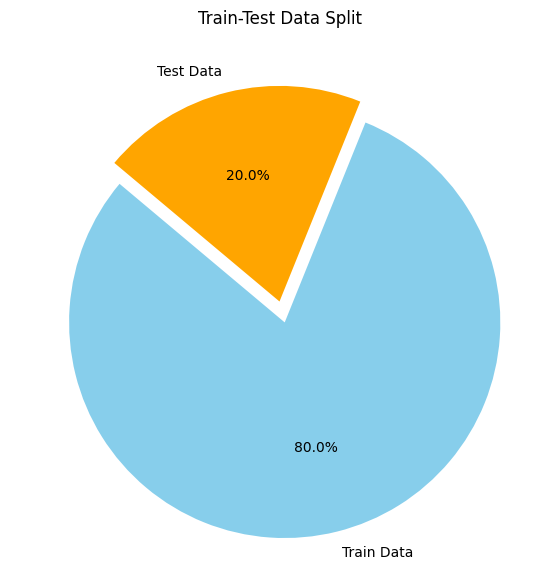

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("size of train data : " , X_train.shape)
print("size of test data : " , X_test.shape)

# Pie chart for train-test split
sizes = [X_train.shape[0], X_test.shape[0]]
labels = ['Train Data', 'Test Data']
colors = ['skyblue', 'orange']
explode = (0.1, 0) 

plt.figure(figsize=(7, 7))
plt.pie(
    sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140
)
plt.title("Train-Test Data Split")
plt.show()

Vectorization

In [36]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new


In [37]:
vectorized_x_train = vectorizer(X_train, filtered_vocab)

In [38]:
vectorized_x_test = vectorizer(X_test, filtered_vocab)

Balanced Imbalanced Dataset

spam
0    3491
1    1065
Name: count, dtype: int64


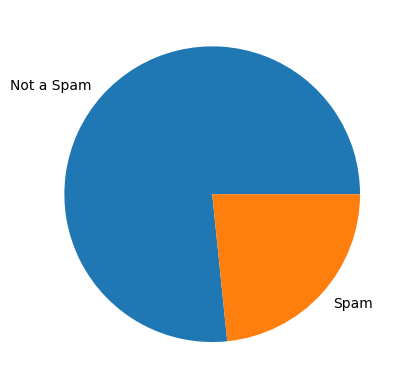

In [39]:
print(Y_train.value_counts())

plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), labels=['Not a Spam', 'Spam'])
plt.show()

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, Y_train_smote = smote.fit_resample(vectorized_x_train, Y_train)
print(vectorized_x_train_smote.shape, Y_train_smote.shape)

(6982, 8331) (6982,)


spam
0    3491
1    3491
Name: count, dtype: int64


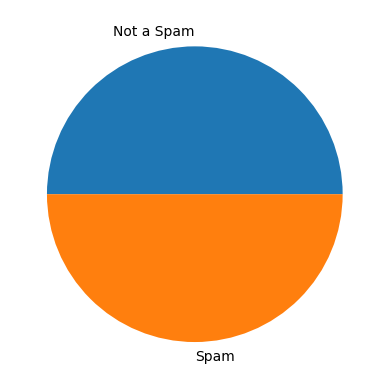

In [41]:
print(Y_train_smote.value_counts())

plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), labels=['Not a Spam', 'Spam'])
plt.show()

In [42]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.2412077, 0.2412077, 0.2412077, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], shape=(6982, 8331), dtype=float32)

In [43]:
Y_train_smote

0       0
1       0
2       1
3       1
4       0
       ..
6977    1
6978    1
6979    1
6980    1
6981    1
Name: spam, Length: 6982, dtype: int64

In [44]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1139, 8331), dtype=float32)

In [45]:
Y_test

1472    0
103     1
1615    0
1236    1
1717    0
       ..
3240    0
5395    0
1757    0
5465    0
5514    0
Name: spam, Length: 1139, dtype: int64

Perform Feature Selection

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

# # Apply Chi-Square feature selection
# k = 1000  # Number of top features to select
# chi2_selector = SelectKBest(chi2, k=k)
# X_train_selected = chi2_selector.fit_transform(vectorized_x_train_smote, Y_train_smote)
# X_test_selected = chi2_selector.transform(vectorized_x_test)

# print("Shape After Chi-Square Selection (Training):", X_train_selected.shape)
# print("Shape After Chi-Square Selection (Testing):", X_test_selected.shape)

k = 1000  # Number of top features to select
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2_selected = chi2_selector.fit_transform(vectorized_x_train_smote, Y_train_smote)
X_test_chi2_selected = chi2_selector.transform(vectorized_x_test)

print("Shape After Chi-Square (Training):", X_train_chi2_selected.shape)
print("Shape After Chi-Square (Testing):", X_test_chi2_selected.shape)





Shape After Chi-Square (Training): (6982, 1000)
Shape After Chi-Square (Testing): (1139, 1000)


In [59]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler

In [60]:
# Step 2: Apply L1 Regularization
# Ensure class imbalance is handled (oversampling in this case)
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_chi2_selected, Y_train_smote)

# Train Logistic Regression with L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train_balanced, y_train_balanced)

# Use SelectFromModel to keep important features
sfm = SelectFromModel(model_l1, prefit=True)
X_train_l1_selected = sfm.transform(X_train_balanced)
X_test_l1_selected = sfm.transform(X_test_chi2_selected)

print("Shape After L1 Regularization (Training):", X_train_l1_selected.shape)
print("Shape After L1 Regularization (Testing):", X_test_l1_selected.shape)

Shape After L1 Regularization (Training): (6982, 286)
Shape After L1 Regularization (Testing): (1139, 286)


Model training

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [64]:
lr = LogisticRegression()
lr.fit(X_train_l1_selected, Y_train_smote)

y_train_pred = lr.predict(X_train_l1_selected)

y_test_pred = lr.predict(X_test_l1_selected)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.995
	Precision = 0.99
	Recall = 1.0
	F1-Score = 0.995
Testing Scores:
	Accuracy = 0.97
	Precision = 0.924
	Recall = 0.967
	F1-Score = 0.945


In [65]:
dt = DecisionTreeClassifier()

dt.fit(X_train_l1_selected, Y_train_smote)

y_train_pred = dt.predict(X_train_l1_selected)

y_test_pred = dt.predict(X_test_l1_selected)

training_scores(Y_train_smote, y_train_pred)

validation_scores(Y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.998
	Recall = 1.0
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.929
	Precision = 0.863
	Recall = 0.871
	F1-Score = 0.867
